# 실무예제 4-4

## 다음은 2016년도 서울시 일별 대기오염도 정보 중 일부이다. 이산화질소, 오존, 일산화탄소, 아황산가스의 농도 및 미세먼지, 초미세먼지 측정치를 대상으로 주성분 분석을 통하여 차원을 축소시키시오.

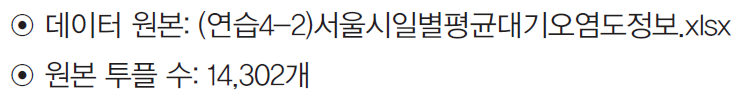
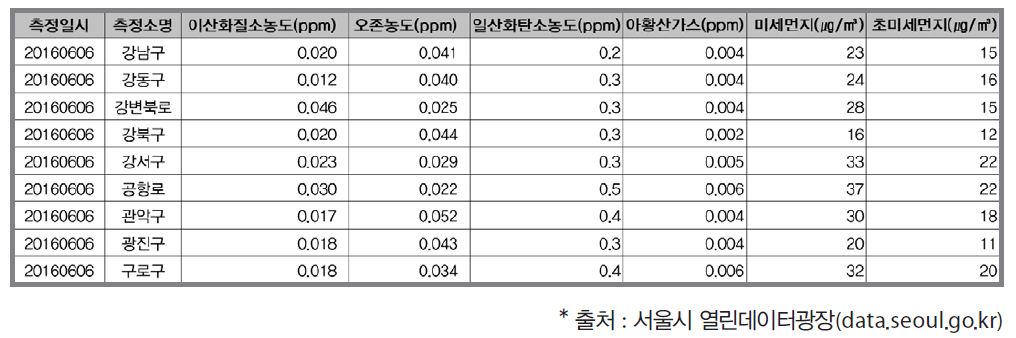

In [3]:
# ex4-4.py
import pandas as pd
import numpy as np

# 데이터로드 ((연습4-2)서울시일별평균대기오염도정보.csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
rawData = pd.read_csv('연습문제파일/(연습4-2)서울시일별평균대기오염도정보.csv', encoding='CP949', engine='python')

In [4]:
rawData

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,20160606,강남구,0.020,0.041,0.2,0.004,23.0,15.0
1,20160606,강동구,0.012,0.040,0.3,0.004,24.0,16.0
2,20160606,강변북로,0.046,0.025,0.3,0.004,28.0,15.0
3,20160606,강북구,0.020,0.044,0.3,0.002,16.0,12.0
4,20160606,강서구,0.023,0.029,0.3,0.005,33.0,22.0
...,...,...,...,...,...,...,...,...
14297,20150606,중구,0.035,0.041,0.4,0.005,31.0,22.0
14298,20150606,중랑구,0.023,0.041,0.3,0.005,31.0,18.0
14299,20150606,청계천,0.040,0.038,0.5,0.009,34.0,12.0
14300,20150606,청량리,0.044,0.034,0.5,0.005,33.0,24.0


In [5]:
# 결측값 채우기 (클래스의 평균으로 채움. 클래스 기준 : 측정소명)
rawData.fillna(rawData.groupby('측정소명').transform('mean'), inplace=True)

In [6]:
rawData

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,20160606,강남구,0.020,0.041,0.2,0.004,23.0,15.0
1,20160606,강동구,0.012,0.040,0.3,0.004,24.0,16.0
2,20160606,강변북로,0.046,0.025,0.3,0.004,28.0,15.0
3,20160606,강북구,0.020,0.044,0.3,0.002,16.0,12.0
4,20160606,강서구,0.023,0.029,0.3,0.005,33.0,22.0
...,...,...,...,...,...,...,...,...
14297,20150606,중구,0.035,0.041,0.4,0.005,31.0,22.0
14298,20150606,중랑구,0.023,0.041,0.3,0.005,31.0,18.0
14299,20150606,청계천,0.040,0.038,0.5,0.009,34.0,12.0
14300,20150606,청량리,0.044,0.034,0.5,0.005,33.0,24.0


In [7]:
# PCA 대상 속성 추출 (이산화질소농도, 오존농도, 일산화탄소농도, 아황산가스, 미세먼지, 초미세먼지)
pca_src = rawData[['이산화질소농도','오존농도','일산화탄소농도','아황산가스','미세먼지','초미세먼지']]

# 데이터 표준화를 위한 sklearn.preprocessing 중 StandardScaler 모듈 임포트
from sklearn.preprocessing import StandardScaler

# StandardScaler() : 데이터를 표준화시키기 위한 함수
pca_std = StandardScaler().fit_transform(pca_src)

# PCA 분석을 위한 sklearn.decomposition 중 PCA 모듈 임포트
from sklearn.decomposition import PCA

### PCA 변환을 시도하기 전에 원 속성값에 대한 Z-score 표준화(정규화)를 수행
#### 표준화하는 이유는 앞서 설명하였듯이, 큰 범위를 갖는 속성들에 의해 작은 범위를 갖는 속성들의 편차가 무시되지 않게 하기 위함임
### 주성분 분석을 위해 sklearn 패키지의 decomposition 모듈에 있는 PCA 서브모듈을 활용함

In [8]:
# i : 몇 차원으로 축소할 것인지에 대한 정보를 담기위한 변수
# cum_prop : n 차원까지의 누적기여율(cumulative proportion)을 담기위한 변수
i = 1
cum_prop = 0

# 몇 차원으로 축소할 것인지를 결정하는 루틴
# 여기서는 누적기여율이 0.9 이상이 되는 차원수까지 진행함
# pca.explained_variance_ratio_ : 분석된 주성분(principal components)의 기여율(percentage of variance)
while True :
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(pca_std)
    cum_prop += pca.explained_variance_ratio_[i-1]
    print("\n차원수 : " + str(i))
    print("기여율(Proportion of Variance) : " + str(pca.explained_variance_ratio_[i-1]))
    print("누적기여율(Cumulative Proportion) : " + str(cum_prop))

    # 누적기여율이 0.9 이상이면 루프 탈출
    if (cum_prop >= 0.9) :
        break
    i += 1


차원수 : 1
기여율(Proportion of Variance) : 0.46946687343561677
누적기여율(Cumulative Proportion) : 0.46946687343561677

차원수 : 2
기여율(Proportion of Variance) : 0.21361892586791204
누적기여율(Cumulative Proportion) : 0.6830857993035289

차원수 : 3
기여율(Proportion of Variance) : 0.12574506467236007
누적기여율(Cumulative Proportion) : 0.808830863975889

차원수 : 4
기여율(Proportion of Variance) : 0.09343395190072531
누적기여율(Cumulative Proportion) : 0.9022648158766143


### 예제는 6차원 속성들에 대해서 몇 차원까지 차원축소를 할 것인지에 대한 결정을 해야함
#### 이에 대한 기준으로 주성분의 누적기여율(cumulative proportion of explained variance)이 0.9(90%) 이상이 되는 것을 삼음. 예를 들어, 누적기여율이 0.9 이상이라는 의미는 차원을 축소하더라도 잃는 정보량(information loss)가 0.1(10%) 이하라는 의미임. 
### 주성분 분석은 pca 모듈의 fit_transform()에 의해 수행됨
### pca의 explained_variance_ratio_ 속성 : 분석된 주성분의 기여율(ratio of explained variance) 정보를 저장
### 주성분의 기여율
#### PC1이 46.95%, PC2가 21.36%, PC3이 12.57%, PC4가 0.93%
### 주성분의 누적기여율
#### PC2까지의 누적기여율은 68.31%, PC3까지의 누적기여율은 80.88%, PC4까지의 누적기여율은 90.23%
### 0.9이상의 누적기여율을 보이는 주성분은 PC1, PC2, PC3, PC4 4개임 

In [9]:
# 주성분으로 구성되는 데이터프레임의 컬럼이름을 저장하는 리스트 변수
str_param = []

# 주성분 컬럼이름 리스트 구성
for j in range(1, i+1) :
    str_param.append("PC" + str(j))  # PC : 주성분(Principal Component)

# 주성분 데이터프레임 구성
principalDf = pd.DataFrame(data=principalComponents
                               , columns=str_param)

# 주성분 데이터프레임 출력
print("\n* 주성분 데이터프레임 : ")
print(principalDf)


* 주성분 데이터프레임 : 
            PC1       PC2       PC3       PC4
0     -2.493132 -1.034162 -0.126472  0.148915
1     -2.509874 -1.094819 -0.008351  0.487907
2     -1.218922  0.341057  0.218421 -0.541971
3     -3.050390 -0.957084  0.916816  0.448155
4     -1.406068 -0.593791 -0.266238 -0.110990
...         ...       ...       ...       ...
14297 -1.185722 -0.967891 -0.261891  0.398097
14298 -1.812113 -1.121391 -0.453546  0.353470
14299 -0.345752 -0.272936 -2.337709  0.948697
14300 -0.549320 -0.430241 -0.027742  0.262542
14301 -0.839374  0.109097  1.007326 -0.122785

[14302 rows x 4 columns]


In [10]:
# components_ : 원 속성('이산화질소농도','오존농도','일산화탄소농도','아황산가스','미세먼지','초미세먼지')에
# 대한 주성분의 영향력(variance) 정도로서, 절대값이 클수록 영향력이 높음
print("\n* 원 속성에 대한 주성분 영향도(행: 주성분, 열: 원속성) : ")
print(pca.components_)


* 원 속성에 대한 주성분 영향도(행: 주성분, 열: 원속성) : 
[[ 0.46415282 -0.23007382  0.41467386  0.35268986  0.4655662   0.46747382]
 [ 0.28772723 -0.70847032  0.21858668  0.03437596 -0.42662791 -0.42931297]
 [ 0.03549555 -0.12114194  0.31690763 -0.9122479   0.1208446   0.19192342]
 [-0.24317213  0.40434929  0.81781396  0.15504361 -0.24224612 -0.16070967]]


### pca의 components_ 속성 : 대상 데이터셋의 원 속성에 대한 주성분의 영향도
#### 절대값이 높을수록 영향도가 크다고 해석할 수 있음
### 원 속성에 대한 주성분의 영향도 (+가 많을수록 강한 양의 영향도, -가 많을수록 강한 음의 영향도)
#### PC1 : 이산화질소농도(++), 오존농도(-), 일산화탄소농도(++), 아황산가스(+), 미세먼지(++), 초미세먼지(++)
#### PC2 : 이산화질소농도(+), 오존농도(---), 일산화탄소농도(+), 미세먼지(--), 초미세먼지(--)
#### PC3 : 일산화탄소농도(+), 아황산가스(----)
#### PC4 : 이산화질소농도(-), 오존농도(++), 일산화탄소농도(++++), 미세먼지(-)

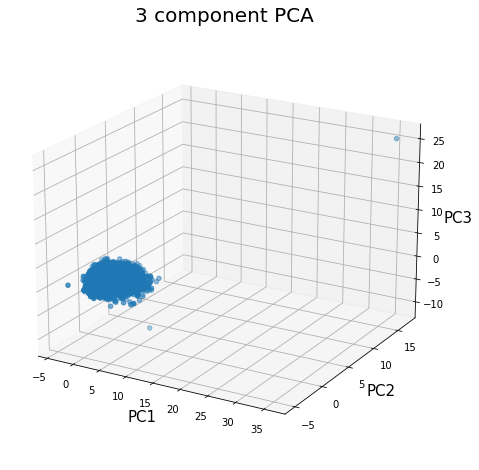

In [11]:
# 주성분의 (차원)수가 3차원이라는 가정 하에 시각화
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3차원 그래프 생성을 위한 모듈 임포트

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

ax.scatter(principalDf.loc[:, 'PC1'], principalDf.loc[:, 'PC2'], principalDf.loc[:, 'PC3'])
ax.view_init(20, -60)
plt.show()  # 3차원 그래프 보여주기

### 주성분이 3개(3차원) 이라는 가정하에 3차원 시각화